<a href="https://colab.research.google.com/github/WaSilveira/Calculo-de-Metricas-de-Avaliacao-de-Aprendizado/blob/main/M%C3%A9tricas__Avalia%C3%A7%C3%A3o_Aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Acurácia: 0.7400
Sensibilidade (Recall): 0.6500
Especificidade: 0.8300
Precisão: 0.7927
F1-Score: 0.7143


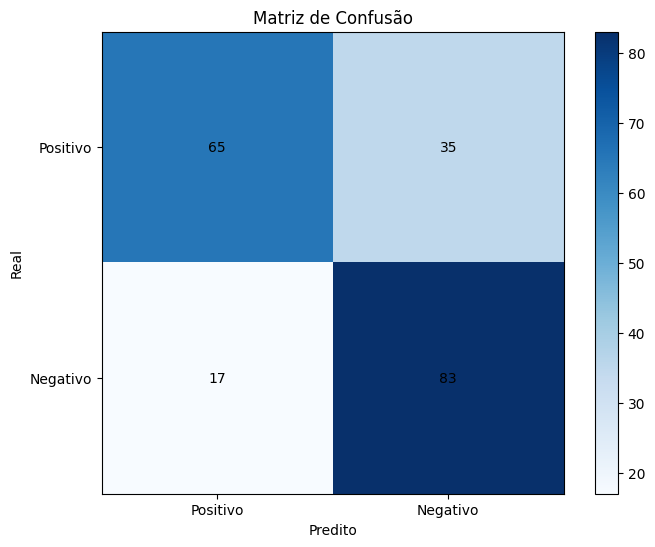

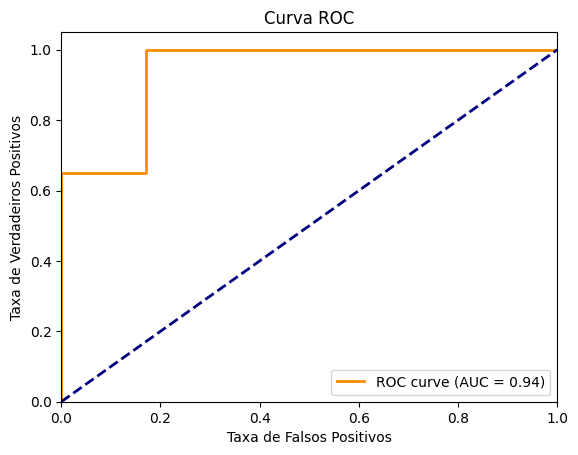

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Definição da matriz de confusão
matriz_confusao = np.array([
    [65, 35],  # Verdadeiros Positivos, Falsos Negativos
    [17, 83]   # Falsos Positivos, Verdadeiros Negativos
])

# Funções para cálculo das métricas
def acuracia(matriz):
    VP, FN, FP, VN = matriz.ravel()
    return (VP + VN) / (VP + FP + FN + VN)

def sensibilidade(matriz):
    VP, FN, _, _ = matriz.ravel()
    return VP / (VP + FN)

def especificidade(matriz):
    _, _, FP, VN = matriz.ravel()
    return VN / (VN + FP)

def precisao(matriz):
    VP, _, FP, _ = matriz.ravel()
    return VP / (VP + FP)

def f1_score(matriz):
    prec = precisao(matriz)
    sens = sensibilidade(matriz)
    return 2 * (prec * sens) / (prec + sens)

# Cálculo e exibição das métricas
metricas = {
    "Acurácia": acuracia(matriz_confusao),
    "Sensibilidade (Recall)": sensibilidade(matriz_confusao),
    "Especificidade": especificidade(matriz_confusao),
    "Precisão": precisao(matriz_confusao),
    "F1-Score": f1_score(matriz_confusao)
}

for metrica, valor in metricas.items():
    print(f"{metrica}: {valor:.4f}")

# Visualização da matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(matriz_confusao, cmap='Blues')
plt.title("Matriz de Confusão")
plt.colorbar()
plt.xlabel("Predito")
plt.ylabel("Real")
plt.xticks([0, 1], ["Positivo", "Negativo"])
plt.yticks([0, 1], ["Positivo", "Negativo"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, matriz_confusao[i, j], ha='center', va='center')

plt.show()

# Funções para cálculo e plotagem da curva ROC
def calcular_roc(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

def plotar_roc(fpr, tpr, roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

# Exemplo de uso da curva ROC
# Criando dados simulados baseados na matriz de confusão
y_true = np.array([1] * 65 + [1] * 35 + [0] * 17 + [0] * 83)
y_scores = np.array([0.9] * 65 + [0.4] * 35 + [0.6] * 17 + [0.1] * 83)

fpr, tpr, roc_auc = calcular_roc(y_true, y_scores)
plotar_roc(fpr, tpr, roc_auc)


Discussão da Matriz de Confusão:

A matriz de confusão (VP: 65, FN: 35, FP: 17, VN: 83) revela um bom desempenho do modelo na identificação de casos positivos e negativos, com eficácia particular em verdadeiros negativos. Contudo, há espaço para melhorias, especialmente na redução de falsos negativos, críticos em diagnósticos médicos como COVID-19.

Discussão da Curva ROC:

A curva ROC ilustra o trade-off entre sensibilidade e taxa de falsos positivos em diferentes limiares de classificação. A área sob a curva (AUC) quantifica o desempenho global do modelo, com valores próximos a 1 indicando excelente capacidade de discriminação entre classes positivas e negativas. A forma da curva e sua distância da diagonal fornecem insights sobre o desempenho do modelo em diversos pontos de corte.
